[logistic회귀]는 전체 데이터를 두개의 데이터로 나눌수있는 최적의 직선을 찾는 학습알고리즘 [선형회기와의 비교] 선형에서는 y=wx+b라는 +-무한대사이의 완벽한 직선을 만들었다면, 로지스텍에서는 y=wx+b에 특정조건 if y>T,y=T,y<0,y=0같은 y범위 조건주어서 선을 단순직선에서 나아가 정교화하게 만듬 또 if y>1 y=1 y<0 y=0으로 분류해서 0,1로 나누어진 확률함수로 분류 더나아가 미분가능한 연속함수로 변환 하는 방법을 사용

1. 학습모델정의

[sigmoid function 시그모이드 함수]미분가능한 연속함수, s자 곡선을 가지며, 중심0을 기준으로 +1과 0으로 수렴
[시그모이드 미분함수]정규분포모양을 가짐

[시그모이드에서 w값분석]w가 작을수록(=상관이작으면,0에가까우면) 직선에 가깝고 w가 크면(=상관이크면) 기울기가 커짐(심한 s)// 그런데 w가 너무크면 즉 기울기가 너무심하면, +-를 구분짓는 경계영역이 좁아져서 작은변화에도 +-분류값이 바뀔수있음

[시그모이드에서 b값분석]b는 y절편을 의미인데 시그모이드에서는 x축으로(왼쪽오른쪽) 얼마나 이동할껀지를 의미함. 그래프의 왼쪽은 +영역/ 오른쪽은-영역 이기때문에 y절편의 증감이 +영역,-영역중 누가 커지는지 결정됨

2. 학습방법

[시그모이드에서 cost함수]경사하강법을 통해 cost가 최저가 되는 w와 b를 찾는거!
이때 선형회기는 전체cost함수에서의 최저점을 찾으면 되었지만, 시그모이드 함수는 구불구불하기 때문에
전체cost함수의 최소값이 전체의 최소가 아닌 지역적 최소점이 되는 오류가 생길수 있음
[때문에 Log기반 cost함수를 사용해야함]

[시그모이드 cost함수에서 log를 적용하면] w가 어디서 시작하든 최소점을 찾을수 있음 이때 [학습횟수]가 증가하면 w가 커지고 데이터들이 더 응집됨을 알수있음

In [5]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

sess=tf.compat.v1.Session()

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline



1. 로지스틱 함수 그려보기(w크기가 작을수록 직선형태가됨)

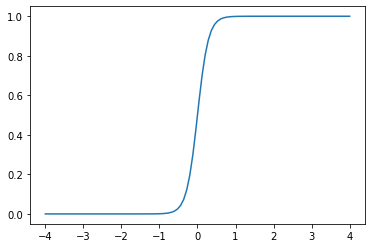

In [37]:
w = 7
b =0.0
x = np.linspace(-4,4,100)

h = w*x+b
# 시그모이드함수
y = tf.sigmoid(h)

y_ = sess.run(y)
plt.plot(x, y_)

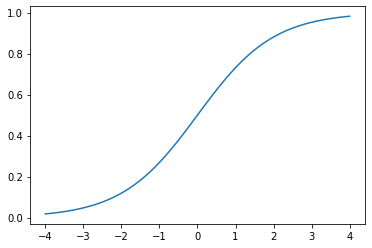

In [7]:
w = 1.0
b =0.0
x = np.linspace(-4,4,100)

h = w*x+b
# 시그모이드함수
y = tf.sigmoid(h)

y_ = sess.run(y)
plt.plot(x, y_)

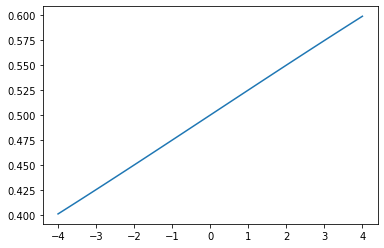

In [8]:
w = 0.1
b =0.0
x = np.linspace(-4,4,100)

h = w*x+b
# 시그모이드함수
y = tf.sigmoid(h)

y_ = sess.run(y)
plt.plot(x, y_)

6.914400106935423e-13 0.9999999999993086
0.01798620996209156 0.9820137900379085
0.401312339887548 0.5986876601124521


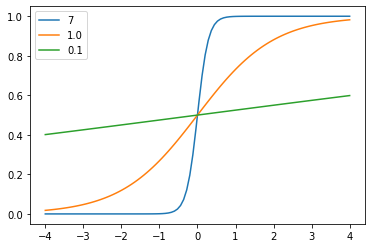

In [9]:
## 위의 3개의 그래프를 하나로 나타내어 보자
ws = [7, 1.0, 0.1]
for i in range(3) :
    b=0.0
    w=ws[i]
    x=np.linspace(-4, 4, 100)
    h = w*x+b
    y=tf.sigmoid(h)
    
    y_ = sess.run(y)
    plt.plot(x, y_)
    
    print(np.min(y_), np.max(y_)) ## 각각의 경우 최소 최대값도 나타내어보자구
plt.legend(ws)

2. b값 변화에 따른 시그모이드함수의 변화: 작아질수록 양의영역이 커지고 음의 영역이작아짐

0.01798620996209156 0.9820137900379085
0.01098694263059318 0.9706877692486436
0.02931223075135632 0.9890130573694068


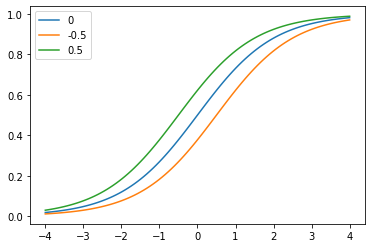

In [10]:
## 위의 3개의 그래프를 하나로 나타내어 보자
bs = [0,-0.5,0.5]  ## b의값이 3가지로 변화
for i in range(3) :
    b=bs[i]
    w=1  ## w는 고정
    x=np.linspace(-4, 4, 100)
    h = w*x+b
    y=tf.sigmoid(h)
    
    y_ = sess.run(y)
    plt.plot(x, y_)
    
    print(np.min(y_), np.max(y_)) ## 각각의 경우 최소 최대값도 나타내어보자구
plt.legend(bs)

3. log함수그려보기

13.815510557964274
13.815510557964274


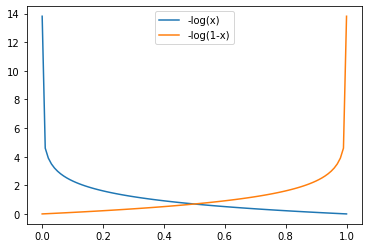

In [11]:
##그런데 x가 0이면 log0이됨..그래서 아주작은 수를 x에 더해서 x가1이 되는걸 방지함
## 버전문제로 tf.math.log 라고 적음
x = np.linspace(0, 1, 100)

y = sess.run ( -tf.math.log(x+0.000001) ) ## logx
plt.plot(x,y)
print(y[0])## x가 0일때 y출력값

y2 = sess.run ( -tf.math.log(1-x+0.000001) )## log(1-x)
plt.plot(x,y2)
print(y2[99]) ## x가 99일때 y출력값, 
plt.legend(['-log(x)', '-log(1-x)']) 

3. sigmoid함수에 대한 cost함수의 특성

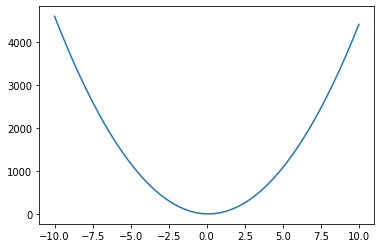

In [12]:
## 일반cost함수
# w값
ws = np.linspace(-10, 10, 50)
# 학습데이터 x와y
x_data = np.array([1, 2.4, 3.1,  4.1,  6.3, 7.8, 8.43, 9.6, 10.4])
y_data = np.array([0,0,0,0, 1,1,1,1,1])

cost = []
for w in ws :
## 학습함수
    h = w * x_data
##cost는 h와y차이의 제곱
    v =  (h - y_data)**2
    cost.append(np.mean(v))
plt.plot(ws, cost)

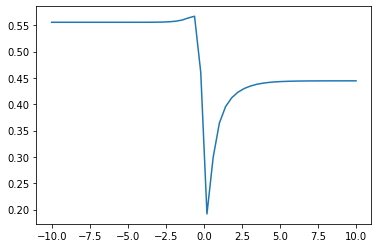

In [13]:
## sigmoind를 이용해 cost함수정의
ws = np.linspace(-10, 10, 50)
x_data = np.array([1, 2.4, 3.1,  4.1,  6.3, 7.8, 8.43, 9.6, 10.4])
y_data = np.array([0,0,0,0, 1,1,1,1,1])

cost = []
for w in ws :
    h = w * x_data
## 학습함수의 출력결과인 h에 sigmoid함수적용 
    y_ = sess.run(tf.sigmoid(h))

    v =  (y_ - y_data)**2
    cost.append(np.mean(v))
plt.plot(ws, cost)

기울기가 0인부분은 학습이 이루어지지 않음, w의 시작점에 영향을 받음

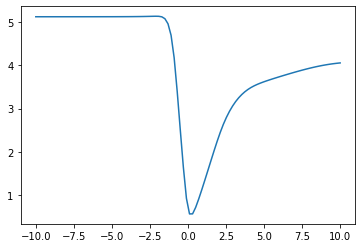

In [14]:
#log함수를 사용한 cost함수정의
ws = np.linspace(-10, 10, 100)
x_data = np.array([1, 2.4, 3.1,  4.1,  6.3, 7.8, 8.43, 9.6, 10.4])
y_data = np.array([0,0,0,0, 1,1,1,1,1])

cs = []    
for w in ws : 
    h = w * x_data
    y = tf.sigmoid(h)
    ###x-1이 0이면 log0이라는 에러발생.. 그래서 아무미미한 10e-5를 더해줌
    cost = -tf.reduce_mean(y_data * tf.math.log(y+10e-5) + ( 1 - y_data) * tf.math.log(1-y+10e-5 ))
    c = sess.run(cost)
    cs.append(c)
plt.plot(ws, cs)

w가 어디서 시작하든 경사하강법을 통해 글로벌한 최저점을 찾을수 있음

## 실습 1 (1차원)

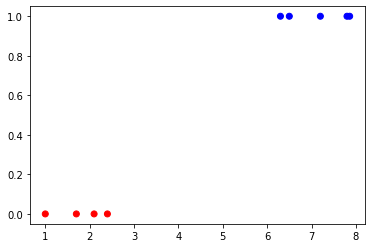

In [16]:
#1
x_data = np.array([1.0, 2.4, 2.1,  1.7,  6.3, 7.8, 7.2, 7.86, 6.5])
y_data = np.array([0.0, 0,0,0, 1,1,1,1,1])

colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]
plt.scatter(x_data, y_data, color=colors)

## 두데이터 중에 y값이 0이면 빨강, 1이면 블루라는 데이터를 준비

step 0  :  cost=1.274518    w=0.992452    b=0.995844  predict=[1. 1. 1. 1. 1. 1. 1. 1. 1.]
step 5000  :  cost=0.081454    w=1.047536    b=-3.895772  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]
step 10000  :  cost=0.040981    w=1.347385    b=-5.258113  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]
step 15000  :  cost=0.027413    w=1.525708    b=-6.056407  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]
step 20000  :  cost=0.020633    w=1.652992    b=-6.622487  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]


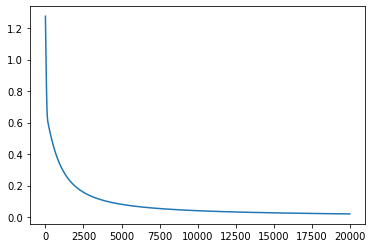

In [18]:
## GradientDescentOptimizer가 버전문제로 안먹어서 적어줌
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
## 2. 학습모델 만들기
# 추정할 파라미터 w와b를 1.0으로 초기화
w = tf.Variable(1.0)
b = tf.Variable(1.0)

# 데이터의 가설에 sigmoid함수 적용
hypothesis = tf.sigmoid(w * x_data + b)

# cost는 log함수로 정의하고, 경사하강법을 cost함수로 최소화
cost = -tf.reduce_mean(y_data * tf.math.log(hypothesis) + (1 - y_data) * tf.math.log(1 - hypothesis))

# 학습율은 0.01로 지정
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# sigmoid가 적용된 가설 출력값이 0.5보다 크면 1(즉 작으면 0)
predict = tf.cast(hypothesis > 0.5, 1)

#여러 tf들을 초기화시킨후 
sess.run(tf.initialize_all_variables())

# 학습시작
cs = []
iteration = 20001 # 학습을 20001해다우
for step in range(iteration):
    c, w_, b_, p,_ = sess.run([cost, w, b, predict,update])
    if step % 5000 == 0: ## 5000번에 한번 값을 출력해다오
        print("step %d  :  cost=%f    w=%f    b=%f  predict=%s" % (step, c, w_, b_, p))
    cs.append(c)
plt.plot(cs)

5000번이후 predict는 같은데(000011111), cost는 계속줄어듬 즉 학습이 계속되고있군

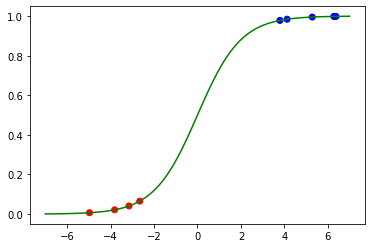

In [20]:
### 이번에는 학습횟수를 늘리면 어떻게 되는지보자
## 어떻게 학습된건지 그래프로 그려보자
# sigmoid가 적용된 가설 출력값이 0.5보다 크면 1(즉 작으면 0)

## 학습된 데이터값
h =  w_ * x_data + b_
y_ = 1 /( 1+  np.exp(-h ))
plt.scatter(h,y_, color=colors)


## 학습된 sigmoid곡선
x = np.linspace(-7, 7, 100)
y = 1 / (1+ np.exp(-x))
plt.plot(x,y, color='green')

step 0  :  cost=1.274518    w=0.992452    b=0.995844  predict=[1. 1. 1. 1. 1. 1. 1. 1. 1.]
step 5000  :  cost=0.081454    w=1.047536    b=-3.895772  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]


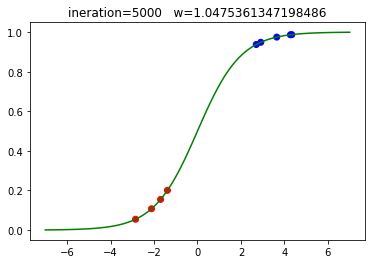

In [21]:
## GradientDescentOptimizer가 버전문제로 안먹어서 적어줌
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# 추정할 파라미터 w와b를 1.0으로 초기화
w = tf.Variable(1.0)
b = tf.Variable(1.0)

# sigmoid가 들어간 데이터의 가설에 x_data넣기
hypothesis = tf.sigmoid(w * x_data + b)

# cost는 log함수로 정의하고, 경사하강법을 cost함수로 최소화
cost = -tf.reduce_mean(y_data * tf.math.log(hypothesis) + (1 - y_data) * tf.math.log(1 - hypothesis))

# 학습율은 0.01로 지정
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# sigmoid가 적용된 가설 출력값이 0.5보다 크면 1(즉 작으면 0)
predict = tf.cast(hypothesis > 0.5, 1)

#여러 tf들을 초기화시킨후 
sess.run(tf.initialize_all_variables())

# 학습시작 :이번에는 학습횟수를 늘림
iteration = 5000
for step in range(iteration+1):
    c, w_, b_, p, _ = sess.run([cost, w, b, predict,update])
    if step % 5000 == 0: ## 5000번에 한번 값을 출력해다오
        print("step %d  :  cost=%f    w=%f    b=%f  predict=%s" % (step, c, w_, b_, p))

## 학습된 데이터값
h =  w_ * x_data + b_
y_ = 1 /( 1+  np.exp(-h ))
plt.scatter(h,y_, color=colors)

## 학습된 sigmoid곡선
x = np.linspace(-7, 7, 100)
y = 1 / (1+ np.exp(-x))
plt.plot(x,y, color='green')
plt.title( 'ineration={0}   w={1}'.format(iteration, w_)   )
plt.savefig('logstic_{0}.png'.format(iteration))

step 0  :  cost=0.027409    w=1.525767    b=-6.056669  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]
step 5000  :  cost=0.020631    w=1.653037    b=-6.622683  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]
step 10000  :  cost=0.016563    w=1.752131    b=-7.061687  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]
step 15000  :  cost=0.013848    w=1.833333    b=-7.420499  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]
step 20000  :  cost=0.011907    w=1.902153    b=-7.724020  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]
step 25000  :  cost=0.010449    w=1.961892    b=-7.987133  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]
step 30000  :  cost=0.009313    w=2.014664    b=-8.219304  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]
step 35000  :  cost=0.008403    w=2.061972    b=-8.427273  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]
step 40000  :  cost=0.007657    w=2.104803    b=-8.615410  predict=[0. 0. 0. 0. 1. 1. 1. 1. 1.]


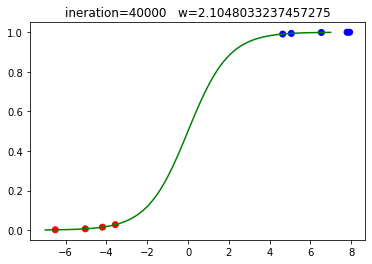

In [23]:
# 학습시작 :이번에는 학습횟수를 늘림
iteration = 40000
for step in range(iteration+1):
    c, w_, b_, p, _ = sess.run([cost, w, b, predict,update])
    if step % 5000 == 0: ## 5000번에 한번 값을 출력해다오
        print("step %d  :  cost=%f    w=%f    b=%f  predict=%s" % (step, c, w_, b_, p))

## 학습된 데이터값
h =  w_ * x_data + b_
y_ = 1 /( 1+  np.exp(-h ))
plt.scatter(h,y_, color=colors)

## 학습된 sigmoid곡선
x = np.linspace(-7, 7, 100)
y = 1 / (1+ np.exp(-x))
plt.plot(x,y, color='green')
plt.title( 'ineration={0}   w={1}'.format(iteration, w_)   )
plt.savefig('logstic_{0}.png'.format(iteration))

[학습횟수]가 증가하면 w가 커지고 데이터들이 더 응집됨을 알수있음(데이터 구분이 좋아짐)

In [24]:
### 학습모델을 사용해 테스트데이터에 대한 인식율계산하기
## 테스트데이터 정의하기
x_test = np.array([3.2, 6.3, 7.8, 8.43, 9.6, 2.4])
y_test = np.array([0.0, 1, 1, 1,1, 0])

# sigmoid가 들어간 데이터의 가설에 x_test넣어서 추정기
hypothesis = tf.sigmoid(w * x_test + b)

# 추정값이 0.5를 넘으면 1 , 낮으면 0 ##cast는 true,false를 1,0으로 바꾸는거
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

#예측치와 y_test(정답)이 같으면 1, 틀리면 0
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_test), dtype=tf.float32))
p, a = sess.run([predict, accuracy])

print(p, a)

[0. 0. 0. 0. 1. 1. 1. 1. 1.] 1.0


000011111가 학습데이터와 모양이 같음 즉 인식률 1

## 실습 2 (2개의 정규분포)

(2000, 2)
(2000, 1)


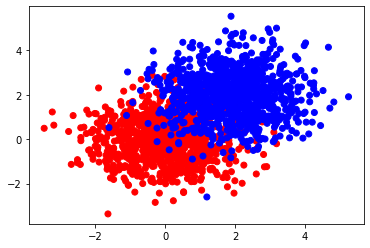

In [25]:
##1단계 데이터 살펴보기
samples = 1000

x_data0 = np.random.normal(0, 1, size=[samples,2]) ## 평균0,표준편차1,빨간데이터
x_data1 = np.random.normal(2, 1, size=[samples,2])## 평균2,표준편차1,파란데이터
x_data = np.vstack([x_data0, x_data1]) ## 2000*2 의 2차원행열
print(x_data.shape)  

y_data = np.vstack([np.zeros(samples).reshape(samples,1) , np.ones(samples).reshape(samples,1) ]) 
print(y_data.shape) **2000*1의 2차원행열(1000개의1과 1000개의0으로 구성)

## y데이터는 0과1로 이루어져 있기에 이렇게 분리함
colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]

plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [28]:
#2단계 학습시키기
##학습데이터를 저장할 placeholder만들기
##학습데이터의 숫자는 가변이라 none이고 x_data가 2000*2의 이차원이니 열은2
x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32)

# 추정해야하는 w는 2개(데이터가 2개의 정규분포) 이기때문에 2*1행렬이고 1로 초기화
## 이때 x가 none*2 , w가 2*1이기 때문에 행렬곱수행가능
w = tf.Variable([[1.0], [1.0]]) 
b = tf.Variable(1.0)  

## sigmoid가설정의
hypothesis = tf.sigmoid(tf.matmul(x, w) + b)

## cost함수는 log를 이용
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

## 추정값이 0.5를 넘으면 1 , 낮으면 0 ##cast는 true,false를 1,0으로 바꾸는거
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

#예측치와 y_test(정답)이 같으면 1, 틀리면 0
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

#여러 tf들을 초기화시킨후 
sess.run(tf.initialize_all_variables())


# 학습시작
for step in range(7001) :
    _, c, a = sess.run([update, cost, accuracy], feed_dict={x:x_data, y:y_data} )
    if  step % 1000 == 0 :
        print(step, c, a)

0 0.7322965 0.619
1000 0.30181473 0.8905
2000 0.24702854 0.9155
3000 0.22650214 0.92
4000 0.21624959 0.9255
5000 0.2103466 0.9255
6000 0.20664456 0.925
7000 0.20418705 0.9255


학습을 많이 할수록 cost는 점점 낮아지고 정확도 a는 점점 나아짐

In [29]:
##3단계  결정경계면 분석 : 시각화를해서 어떻게 학습이 잘되었는지를 보기위해 필요함
### 기본적인 이론은 다음과 같음
xx, yy = np.mgrid[0:3:1, 0:3:1]  ##0과3사이에 1개씩 커지는 행렬만들기
print(xx)                      
print(yy)                      
print(xx.flatten()) ## 1차원으로 만든느 flatten
print(yy.flatten()) ## 1차원으로 만들기

grid = np.c_[xx.flatten(), yy.flatten()] ## 1차원으로 만든걸 함수를 합치기
print(grid)

[[0 0 0]
 [1 1 1]
 [2 2 2]]
[[0 1 2]
 [0 1 2]
 [0 1 2]]
[0 0 0 1 1 1 2 2 2]
[0 1 2 0 1 2 0 1 2]
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]


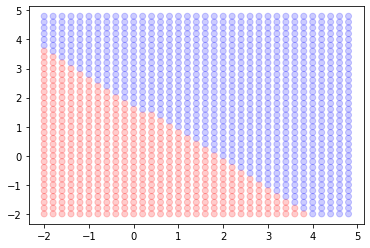

In [32]:
## 결정경계면만들기
# 테스트 데이터 만들기
xx, yy = np.mgrid[-2:5:0.2, -2:5:0.2]  ##-2부터 5까지 0.2씩커지는 행열xx와yy만들기
grid = np.c_[xx.flatten(), yy.flatten()] ## 1행으로 펴주기 flatten나서 concate


# 만들어진 테스트데이터의 예측값계산
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i<  0.5  else  "blue"  for i  in p   ] ##i가 0.5보다작으면빨강
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)## 투명도 0.2

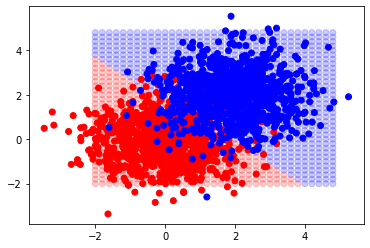

In [33]:
## 만들어진 결정경계면에 학습데이터 합치기
xx, yy = np.mgrid[-2:5:0.2, -2:5:0.2]
grid = np.c_[xx.flatten(), yy.flatten()]

p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i<  0.5  else  "blue"  for i  in p   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

## 학습데이터 합치기
colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

오차가 있지만 두그룹이 비교적 잘분류되는군! 하지만logsist는 직선이라서 두 그룹이 섞은데서 오류가 있음

## 실습 2 (2개의 비선형데이터)

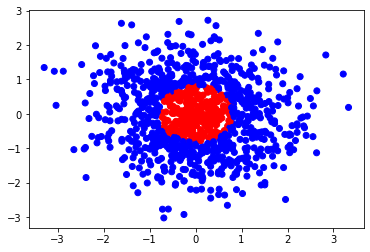

In [34]:
## 1단계 : 데이터 분석

# x_data :평균0, 표준오차1의 1000개 데이터생성, 1000행2열
samples = 1000
x_data = np.random.normal(0, 1, size=[samples,2])
d = np.sqrt([x[0]**2+x[1]**2  for x in x_data ])

# y_data : i의크기에 따라 0,1로 구분, 1000행1열
y_data = np.array([0  if   i < 0.8   else   1 for i  in d   ]).reshape(samples, 1)
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [35]:
## 2단계 : 학습실시

## 이데 데이터 x가 none*2이기에, 행열연산하려고 w를 2*1형태로 넣어줌
x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32)
w = tf.Variable(tf.random_normal([2,1]))   
b = tf.Variable(tf.random_normal([1]))
hypothesis = tf.sigmoid(tf.matmul(x, w) + b)

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.initialize_all_variables())

## 학습을 3001번하고 매 500번마다 결과값을 출력해 주세요
for step in range(3001) :
    _, c, a = sess.run([update, cost,accuracy], feed_dict={x:x_data, y:y_data} )
    if  step % 500 == 0 :
        print(step, c, a)  

0 0.95449656 0.444
500 0.6220321 0.675
1000 0.5897058 0.727
1500 0.58617723 0.727
2000 0.58573306 0.727
2500 0.5856738 0.727
3000 0.58566576 0.727


학습을 많이 할수록 cost는 점점 낮아지고 정확도 a는 점점 나아짐=> 1000기준으로 두개로 나눠지는거 같은데?

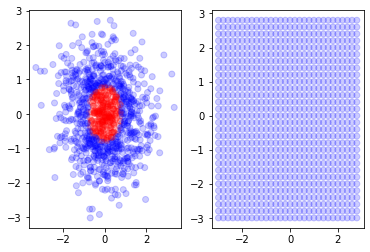

In [36]:
#3단계 : 결정경계면으로 분석(이번에는 두개 따로 그려서 보장)
## 학습데이터 그래프
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)


xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

## 결정경계면 그래프(파란데이터의 수가 많아서 학습결과가 파란색으로만나옴..)
plt.subplot(1,2,2)  
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i<  0.5  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

즉 logistic는 선형분류만 가능하군!

## 실습 4 (당요병실습)

In [38]:
## 1단계 : 데이터 분석
## 불러온 데이터의 기본 shape은 (765,9) 즉765개의 샘플과 9개의 속성
data = np.loadtxt("diabetes.csv", delimiter=",", dtype=np.float32)
print(data.shape)

### 9개의 속성중 '당요병여부' 항목이 0이면 발병안함 1이면 발병의 의미 => y데이터로사용
### 나머지 8개 데이터를 x데이터로 사용
"""
임신횟수
글루코스 내성 실험 후의 혈당수치
확장기 혈압(mm Hg)
상완 삼두근 피부 두께 (mm)
혈액내 인슐린 수치 (mu U/ml)
BMI(비만도) 수치 (weight in kg/(height in m)^2)
당뇨병 가족력: 계산식은 데이터세트의 출처에서 확인하세요.
나이 (years)
당뇨병 여부 (0 or 1; 1은 발병)
"""

label = ["임신횟수", "글루코스 내성 실험 후의 혈당수치", "확장기 혈압", "상완 삼두근 피부 두께",
         "혈액내 인슐린 수치", "BMI", "당뇨병 가족력", "나이"]


dim = 8
x_data = data[:, 0:dim] ## 전체 데이터에서 8개의 속성(0:dim)을 x데이터로 정의
y_data = data[:, dim] ## 마지막 속성(dim)을 y데이터로 정의 / 모양은 (768,)
print(y_data.shape)
y_data = y_data.reshape(768,1)   ## y_data를 (768,1) 모양으로 재배열
print(x_data.shape) ##(768,8)
print(y_data.shape) ##(768,1)


##0에서1사이로 데이터정교화
mx = np.max(x_data, axis=0) ## x의 최대값을 구해서 나눠주기 
x_data = x_data / mx

OSError: diabetes.csv not found.

In [ ]:
## 2단계 학습하기
## x를 none* 8개 속성
x = tf.placeholder(tf.float32, shape=[None,  dim])
y = tf.placeholder(tf.float32)
## 이데 데이터 x가 none*8이기에, 행열연산하려고 w를 8*1형태로 넣어줌
w = tf.Variable(tf.random_normal([dim ,1])) 
b = tf.Variable(tf.random_normal([1]))
hypothesis = tf.sigmoid(tf.matmul(x, w) + b)

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost) 

sess.run(tf.initialize_all_variables())
for step in range(40001) :
    _, c, a = sess.run([update, cost, accuracy], feed_dict={x:x_data, y:y_data} )
    if  step % 5000 == 0 :
        print(step, c, a)

In [ ]:
## 3단계 학습된 모델을 가지고 어떤 속성이 당요와 관계가 높은지 분석하기
## 절대값w가 높을수록 상관이 높은거
w_ =  sess.run(w)
for i in range(dim) :
    print(label[i] , w_[i])

In [41]:
###다른조건은 동일하고 나이만 30에서 60으로 바꾸면?
x_data2 = np.array([
    [0,	90	,66	,29,	0	,26.6,	0.351,	30],
    [0,	90	,66	,29,	0	,26.6,	0.351,	60],
])

mx = np.max(x_data2, axis=0)
x_data2 = x_data2 / mx

p = sess.run(hypothesis, feed_dict={x:x_data2} )  
print(p*100)

C:\Users\Mr. Jae-Hong Seo\anaconda3\envs\study\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


TypeError: unhashable type: 'numpy.ndarray'

## 실습5(스펨데이터)

In [44]:
## 1단계 : 데이터 분석
## 불러온 데이터의 기본 shape은 (4601,58) 즉4601개의 샘플과 58개의 속성
data = np.loadtxt("spambase.csv", delimiter=",", dtype=np.float32)
print(data.shape)
### 58개항목중 마지막 항목이 0이면 발병안함 1이면 발병의 의미 => y데이터로사용
lab = ["make", "address", "all", "3d", "our", "over",  "remove",  "internet", "order", "mail",   "receive",
       "will", "people",  "report", "addresses", "free",  "business",   "email",  "you",  "credit", "your",  "font",  "000", 
       "money",   "hp",  "hpl", "george", "650",  "lab",  "labs",  "telnet",   "857",  "data",  "415",   "85",           
       "technology",   "1999",   "parts",   "pm",   "direct",  "cs",   "meeting", "original", "project",  "re",  "edu",          
       "table", "conference", "char_freq_;", "char_freq_(",  "char_freq_[",   "char_freq_!",   "char_freq_$",   "char_freq_#",            
       "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]   

### 나머지 57개 데이터를 x데이터로 사용
dim = 57
x_data = data[:, 0:57]
y_data = data[:,57] ## 마지막을 y로
y_data = y_data.reshape(4601,1)  ##행렬연산하려고 y모양을 바꿔주고(4601,)에서(4601,1로)

mx = np.max(x_data, axis=0) ## max값으로 나눠서 x값을 0-1사이로 스케일링
x_data = x_data / mx

(4601, 58)


In [45]:
## 2단계 학습시작
x= tf.placeholder(tf.float32, shape=[None,  dim])
y = tf.placeholder(tf.float32)
w = tf.Variable(tf.random_normal([dim ,1])) 
b = tf.Variable(tf.random_normal([1]))
hypothesis = tf.sigmoid(tf.matmul(x, w) + b)

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

init = tf.initialize_all_variables()
sess.run(init)
for step in range(25001) :
    _, c, a = sess.run([train, cost, accuracy], feed_dict={x:x_data, y:y_data} )
    if  step % 5000 == 0 :
        print(step, c, a)

0 0.70424074 0.55509675
5000 0.62840396 0.6509454
10000 0.576 0.7246251
15000 0.53853124 0.76505107
20000 0.5107304 0.7911324
25000 0.48933867 0.8050424


학습을 할수록 cost가 낮아지고 정확도가 점점높아짐(25000학습하면 스팸걸러내는 비율이 80%까지 성장)

<BarContainer object of 57 artists>

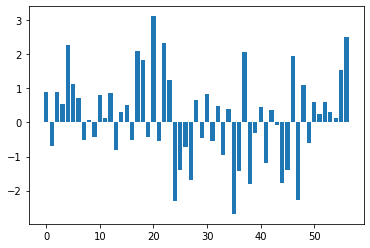

In [46]:
## 3단계 학습된 모델을 가지고 어떤 속성(57속성중에서)이 스팸과와 관계가 높은지 분석하기
## 절대값w가 높을수록 상관이 높은거

w_ = sess.run(w)
plt.bar(np.arange(0,dim), w_.flatten())

In [48]:
## 절대값w가 2보다 큰경우를 관찰해봅시다
idx = np.where( np.abs(w_) > 2.0  ) 
print(idx[0]) ## 절대값w가 2보다 큰경우의 idx번호을 알려달라

word = [ lab[v] for v in idx[0]] ## 그 idx번호에 나오는 단어는 뭔가
print(word) ## 즉 상관관계가 높은 단어에 대한 빈도수가 스팸과 일반메일 구분에 역할을함

[ 4 17 20 22 24 35 37 47 56]
['our', 'email', 'your', '000', 'hp', 'technology', 'parts', 'conference', 'capital_run_length_total']
